# Test 1

### 탐색적 데이터 분석

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
df = pd.read_csv('4. BIGDATA/TOTAL_DATA.csv', encoding='cp949"')
df

팀명    G    E  PKO    PO     A   DP   FPCT  PB   SB  ...  IBB.1  WP  BK  \
0    HT  133  107    1  3536  1477  134  0.979  10  100  ...     17  51   3   
1    LG  133  103   12  3554  1485  129  0.980  16  110  ...     43  52   6   
2    SK  133   96    3  3514  1434  124  0.981  19  106  ...     31  54   1   
3    OB  133  109    3  3541  1599  140  0.979  12  126  ...     17  47   0   
4    LT  133   99    9  3515  1518  141  0.981  12   85  ...     23  53   2   
..   ..  ...  ...  ...   ...   ...  ...    ...  ..  ...  ...    ...  ..  ..   
169  OB   93   59    5  2493   840   87  0.983   4   59  ...     15  37   4   
170  LT   88   46    1  2353   898   86  0.986   4   62  ...     11  46   2   
171  SS   93   68    4  2448   864   91  0.980   2   37  ...      9  33   2   
172  WO   96   71   12  2562  1018   96  0.981   6   59  ...      6  32   7   
173  HH   92   72    3  2419   830   90  0.978   7   76  ...     19  50   4   

     SBA  SB.1  CS.1   SB%  OOB  PKO.1   W  
0    155    92    63  59.4    0      0  60  
1    154    96    58  62.3    0      0  58  
2    182   123    59  67.6    0      0  60  
3    166   132    34  79.5    0      0  65  
4    159   106    53  66.7    0      0  59  
..   ...   ...   ...   ...  ...    ...  ..  
169   84    59    25  70.2   37      1  52  
170   86    65    21  75.6   33      2  45  
171  124    87    37  70.2   32      9  42  
172   96    81    15  84.4   28      7  58  
173   64    37    27  57.8   31      4  26  

[174 rows x 71 columns]

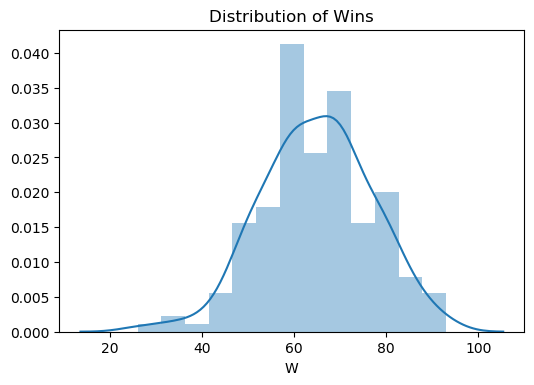

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(dpi=100)
plt.xlabel('Wins')
plt.title('Distribution of Wins')
sns.distplot(df['W'], norm_hist=True)
plt.show()

In [4]:
corr_list = list(df.corr()['W'])
col_list = list(df.columns)[1:]

print("[상관계수 with 'W']")
for i in range(len(col_list)):
    print(col_list[i]+':', corr_list[i])

[상관계수 with 'W']
G: 0.4912138918116086
E: 0.07398971477635438
PKO: 0.03647726872741382
PO: 0.5337075528142012
A: 0.33550076688125485
DP: 0.18998428453214763
FPCT: 0.2508841174672635
PB: -0.14900144380086164
SB: -0.11541437706608959
CS: 0.13165146983832832
CS%: 0.22217846809416922
AVG: 0.5200311348065394
G.1: 0.49238153343686836
PA: 0.567312688093285
AB: 0.5174784128059238
R: 0.6975613053388748
H: 0.6097900732966745
2B: 0.5117195971802011
3B: 0.27860984169190367
HR: 0.48114056613589007
TB: 0.6161684565280963
RBI: 0.688849812540574
SAC: 0.06727067184538447
SF: 0.4672062480120319
BB: 0.537134888092437
IBB: 0.2980170783248593
HBP: 0.4875646888166633
SO: 0.20618542750049218
GDP: 0.29687822352283516
SLG: 0.4990723277290679
OBP: 0.5743398670944203
OPS: 0.5504762673176733
MH: 0.4918930146009818
RISP: 0.4688683949526122
PH-BA: 0.15658469781826825
ERA: -0.3997490597917352
L: -0.5065720433730003
SV: 0.6885675049750097
HLD: 0.3857579737536936
WPCT: 0.8619682891127843
IP: 0.5355434401801716
H.1: 0.2

C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\nakhe\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)


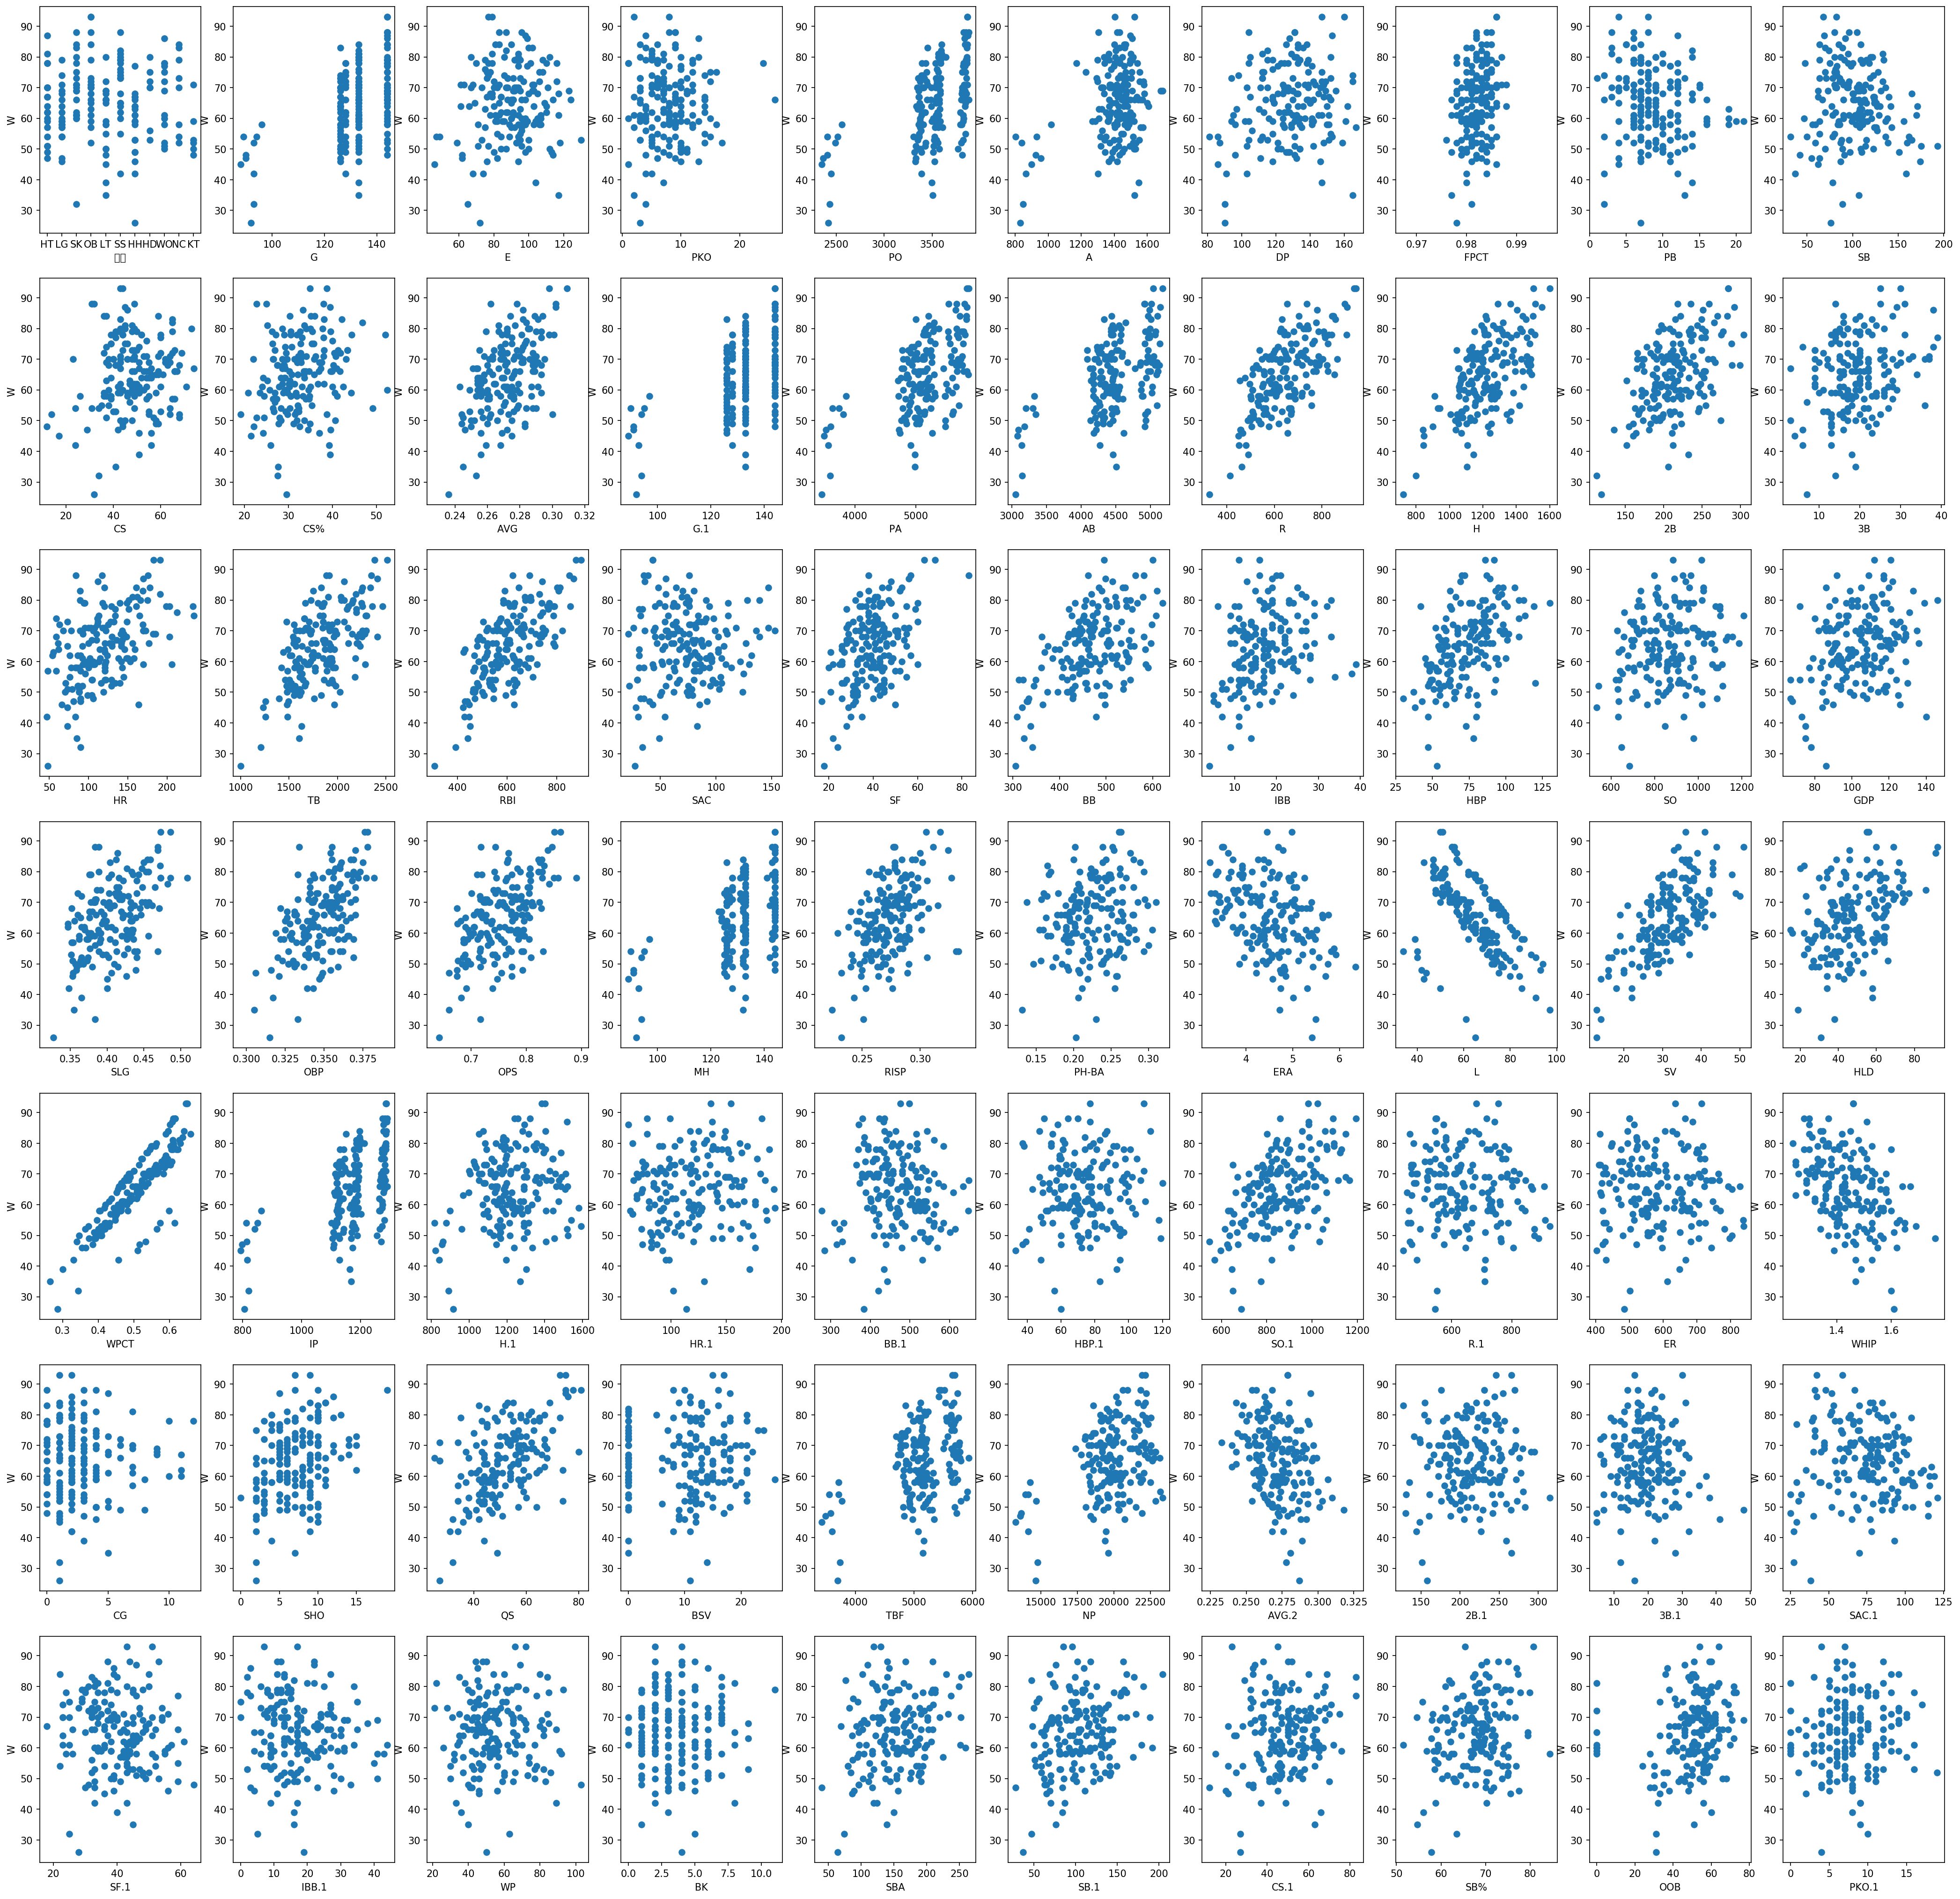

In [5]:
count=1
plt.figure(figsize=(35,35), dpi=150)
for item in list(df.columns):
    if item!='W':
        plt.subplot(7, 10, count)
        plt.xlabel(item)
        plt.ylabel('W')
        plt.scatter(df[item], df['W'])
    count += 1

### Drop 요소 선택

In [6]:
drop_list = ['팀명', 'G', 'PKO', 'PB', 'G.1', 'SAC', 'SO', 'GDP', 'PH-BA', 'MH', 'IP', 'H.1', 'HR.1', 'BB.1', 'HBP.1', 'R.1', 'ER', 'SAC.1', '3B.1', '2B.1', 'BSV', 'IBB.1', 'WP', 'PKO.1']
df = df.drop(drop_list, axis=1)

df.head()

E    PO     A   DP   FPCT   SB  CS   CS%    AVG    PA  ...     NP  AVG.2  \
0  107  3536  1477  134  0.979  100  53  34.6  0.278  5189  ...  19799  0.272   
1  103  3554  1485  129  0.980  110  55  33.3  0.276  5319  ...  21119  0.277   
2   96  3514  1434  124  0.981  106  44  29.3  0.260  5077  ...  19710  0.259   
3  109  3541  1599  140  0.979  126  56  30.8  0.276  5303  ...  20071  0.284   
4   99  3515  1518  141  0.981   85  58  40.6  0.280  5308  ...  19593  0.276   

   SF.1  BK  SBA  SB.1  CS.1   SB%  OOB   W  
0    36   3  155    92    63  59.4    0  60  
1    46   6  154    96    58  62.3    0  58  
2    34   1  182   123    59  67.6    0  60  
3    48   0  166   132    34  79.5    0  65  
4    38   2  159   106    53  66.7    0  59  

[5 rows x 47 columns]

### Data Split

In [7]:
x_data = df.values[:, 0:len(df.columns)-1]
x_data

array([[ 107. , 3536. , 1477. , ...,   63. ,   59.4,    0. ],
       [ 103. , 3554. , 1485. , ...,   58. ,   62.3,    0. ],
       [  96. , 3514. , 1434. , ...,   59. ,   67.6,    0. ],
       ...,
       [  68. , 2448. ,  864. , ...,   37. ,   70.2,   32. ],
       [  71. , 2562. , 1018. , ...,   15. ,   84.4,   28. ],
       [  72. , 2419. ,  830. , ...,   27. ,   57.8,   31. ]])

In [8]:
y_data = df.values[:, [len(df.columns)-1]]
y_data

array([[60.],
       [58.],
       [60.],
       [65.],
       [59.],
       [81.],
       [61.],
       [72.],
       [78.],
       [66.],
       [61.],
       [66.],
       [35.],
       [82.],
       [59.],
       [70.],
       [78.],
       [60.],
       [66.],
       [57.],
       [39.],
       [76.],
       [63.],
       [80.],
       [67.],
       [59.],
       [61.],
       [70.],
       [50.],
       [73.],
       [53.],
       [75.],
       [49.],
       [54.],
       [70.],
       [72.],
       [58.],
       [74.],
       [64.],
       [53.],
       [64.],
       [47.],
       [60.],
       [63.],
       [50.],
       [73.],
       [67.],
       [70.],
       [51.],
       [58.],
       [73.],
       [70.],
       [55.],
       [62.],
       [67.],
       [56.],
       [57.],
       [46.],
       [83.],
       [70.],
       [69.],
       [65.],
       [50.],
       [64.],
       [81.],
       [54.],
       [80.],
       [71.],
       [66.],
       [64.],
       [46.],
      

### Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
x_data = scaler.fit_transform(x_data)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((147, 46), (147, 1), (27, 46), (27, 1))

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[-1.49029827e+00  1.36973531e+01 -5.82302655e-02 -1.76153094e-02
  -1.29262285e+00 -1.93015805e-01  7.39183123e-02 -5.04111961e-01
  -3.13561005e+00 -1.94194403e+00 -1.82263764e+01  5.84953413e-01
   1.76314949e+01 -8.47806961e-01 -1.19419983e-01 -1.66175485e+00
   9.06260430e+00 -3.90310330e-01  3.44568264e-02  3.86405438e+00
  -7.79079049e-02  1.14954445e+00 -9.63345303e-01 -5.40666174e+00
  -2.42905315e+00 -3.64553092e-01  1.13450191e+00  6.68568882e+00
   1.49745848e-01  1.69734625e-01  1.60979770e+01  1.41761039e-01
   2.74591953e+00 -3.93927321e-02  1.93725050e-01  2.86708854e-01
  -1.09158354e+01 -1.29388405e+00 -6.01883029e-01 -7.02444373e-02
   1.80924516e-02  2.60238667e-01  6.91061308e-01 -9.12466063e-01
  -9.63619318e-01 -9.05917306e-02]]
절편: [64.85177176]
훈련 정확도:0.99624
테스트 정확도:0.98581


In [13]:
y_predict = lr.predict(X_test)

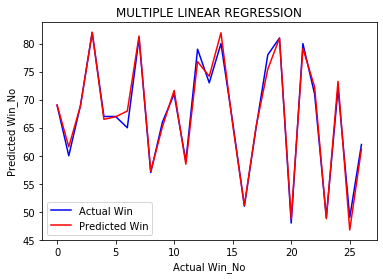

In [14]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='b')
plt.plot(y_predict, color='r')
plt.xlabel("Actual Win_No")
plt.ylabel("Predicted Win_No")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.legend(['Actual Win', 'Predicted Win'])
plt.show()

# Test 2

### 탐색적 데이터 분석

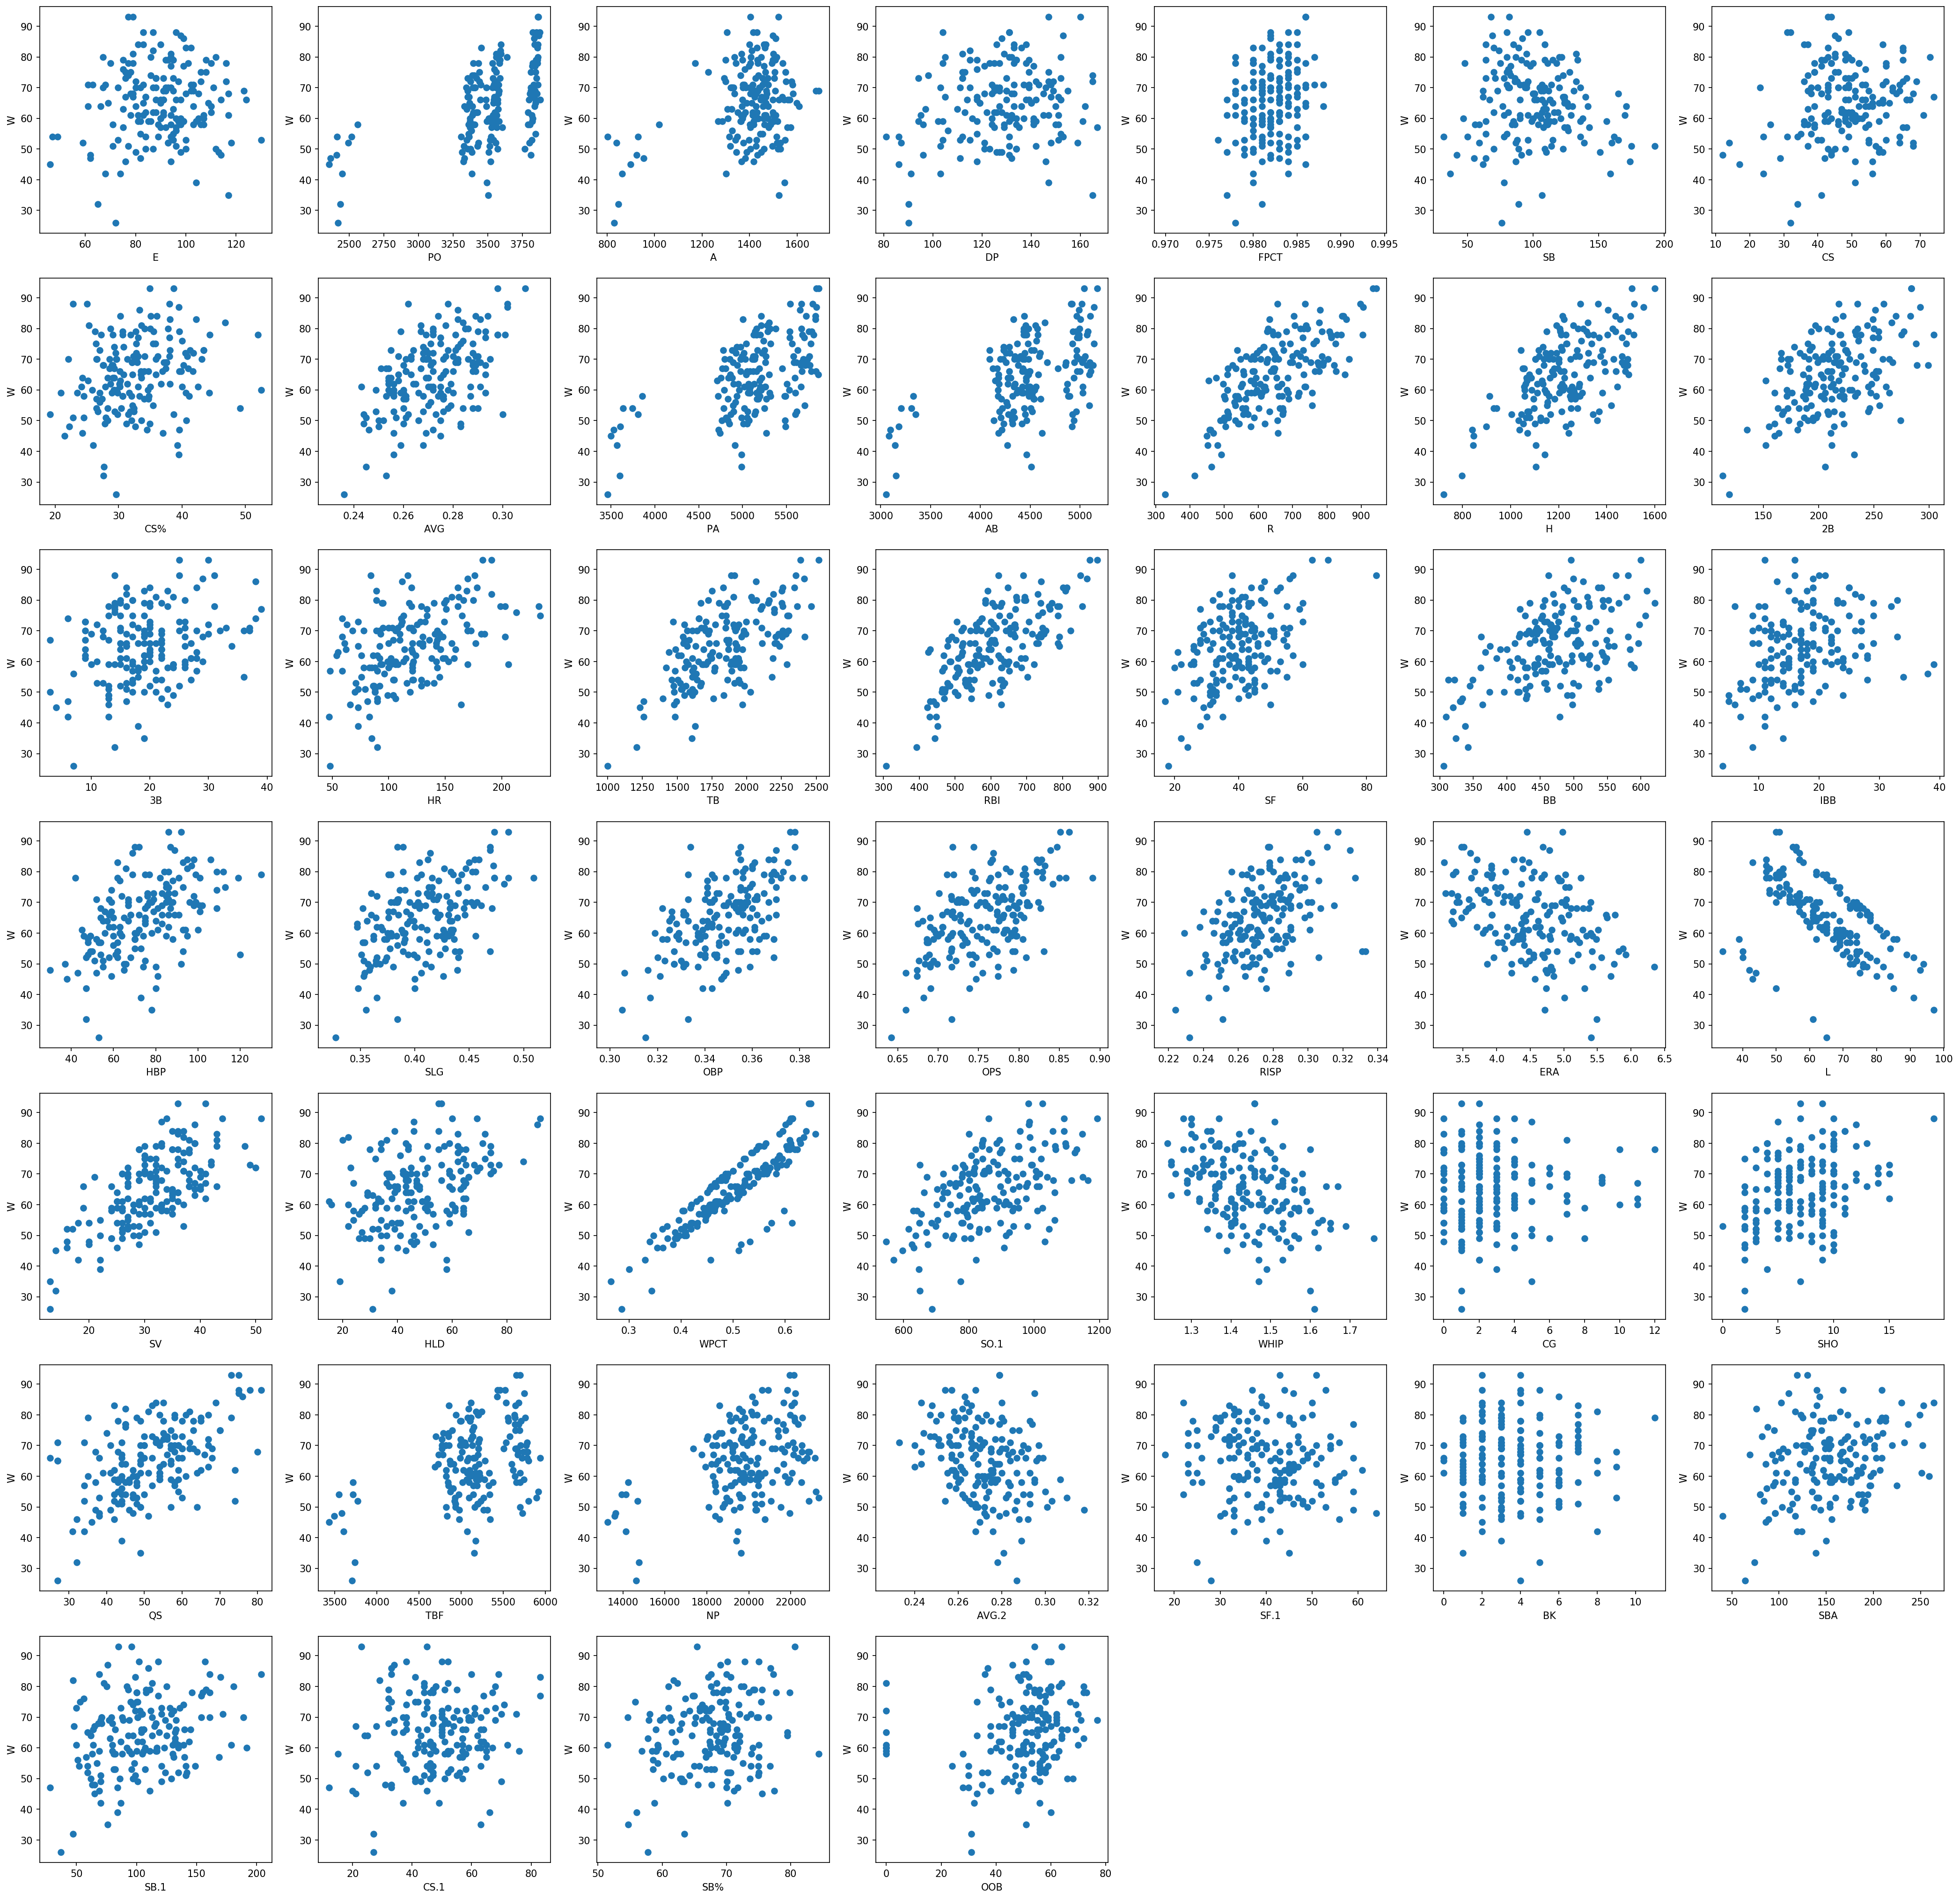

In [15]:
count=1
plt.figure(figsize=(35,35), dpi=150)
for item in list(df.columns):
    if item!='W':
        plt.subplot(7, 7, count)
        plt.xlabel(item)
        plt.ylabel('W')
        plt.scatter(df[item], df['W'])
    count += 1

### Drop 요소 선택

In [16]:
drop_list = ['PO', 'A', 'FPCT', 'CG', 'SHO', 'BK']
df = df.drop(drop_list, axis=1)

df.head()

E   DP   SB  CS   CS%    AVG    PA    AB    R     H  ...   TBF     NP  \
0  107  134  100  53  34.6  0.278  5189  4542  683  1263  ...  5207  19799   
1  103  129  110  55  33.3  0.276  5319  4521  669  1247  ...  5380  21119   
2   96  124  106  44  29.3  0.260  5077  4400  596  1143  ...  5110  19710   
3  109  140  126  56  30.8  0.276  5303  4583  732  1266  ...  5282  20071   
4   99  141   85  58  40.6  0.280  5308  4521  718  1265  ...  5189  19593   

   AVG.2  SF.1  SBA  SB.1  CS.1   SB%  OOB   W  
0  0.272    36  155    92    63  59.4    0  60  
1  0.277    46  154    96    58  62.3    0  58  
2  0.259    34  182   123    59  67.6    0  60  
3  0.284    48  166   132    34  79.5    0  65  
4  0.276    38  159   106    53  66.7    0  59  

[5 rows x 41 columns]

### DATA Split

In [17]:
x_data = df.values[:, 0:len(df.columns)-1]
x_data

array([[107. , 134. , 100. , ...,  63. ,  59.4,   0. ],
       [103. , 129. , 110. , ...,  58. ,  62.3,   0. ],
       [ 96. , 124. , 106. , ...,  59. ,  67.6,   0. ],
       ...,
       [ 68. ,  91. ,  37. , ...,  37. ,  70.2,  32. ],
       [ 71. ,  96. ,  59. , ...,  15. ,  84.4,  28. ],
       [ 72. ,  90. ,  76. , ...,  27. ,  57.8,  31. ]])

In [18]:
y_data = df.values[:, [len(df.columns)-1]]
y_data

array([[60.],
       [58.],
       [60.],
       [65.],
       [59.],
       [81.],
       [61.],
       [72.],
       [78.],
       [66.],
       [61.],
       [66.],
       [35.],
       [82.],
       [59.],
       [70.],
       [78.],
       [60.],
       [66.],
       [57.],
       [39.],
       [76.],
       [63.],
       [80.],
       [67.],
       [59.],
       [61.],
       [70.],
       [50.],
       [73.],
       [53.],
       [75.],
       [49.],
       [54.],
       [70.],
       [72.],
       [58.],
       [74.],
       [64.],
       [53.],
       [64.],
       [47.],
       [60.],
       [63.],
       [50.],
       [73.],
       [67.],
       [70.],
       [51.],
       [58.],
       [73.],
       [70.],
       [55.],
       [62.],
       [67.],
       [56.],
       [57.],
       [46.],
       [83.],
       [70.],
       [69.],
       [65.],
       [50.],
       [64.],
       [81.],
       [54.],
       [80.],
       [71.],
       [66.],
       [64.],
       [46.],
      

### Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
x_data = scaler.fit_transform(x_data)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((147, 40), (147, 1), (27, 40), (27, 1))

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[-3.72266046e-02  3.56238217e-02  1.96365991e-02  1.29932643e-01
  -4.17152089e-01 -9.59876658e-01  1.85399424e+00 -1.82738394e+01
  -1.14637416e+00  4.96433969e+12  1.10095037e+12  4.53711934e+11
   3.64732252e+12 -8.88047144e+12  5.34885267e-01 -7.12889440e-02
   5.04426481e+00 -1.37544843e-01  1.43058231e+00 -1.19497683e+14
  -5.15416281e+13  1.62114888e+14 -2.17936929e-01  4.53687692e-01
   6.30008302e+00  2.30337458e-01  1.39704908e-01  1.64532807e+01
   4.90726412e-01  9.05087644e-01  2.29478170e-01 -9.62474641e-01
  -1.91017394e+00 -3.77963167e-01  4.02797161e-02  4.19211218e+12
  -3.27310629e+12 -1.28329970e+12 -9.85113578e-01 -6.95683560e-02]]
절편: [64.93471979]
훈련 정확도:0.99474
테스트 정확도:0.99162


In [23]:
y_predict = lr.predict(X_test)

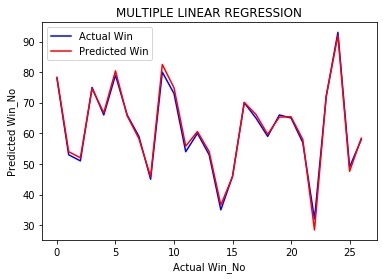

In [24]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='b')
plt.plot(y_predict, color='r')
plt.xlabel("Actual Win_No")
plt.ylabel("Predicted Win_No")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.legend(['Actual Win', 'Predicted Win'])
plt.show()

# Test 3

### 탐색적 데이터 분석

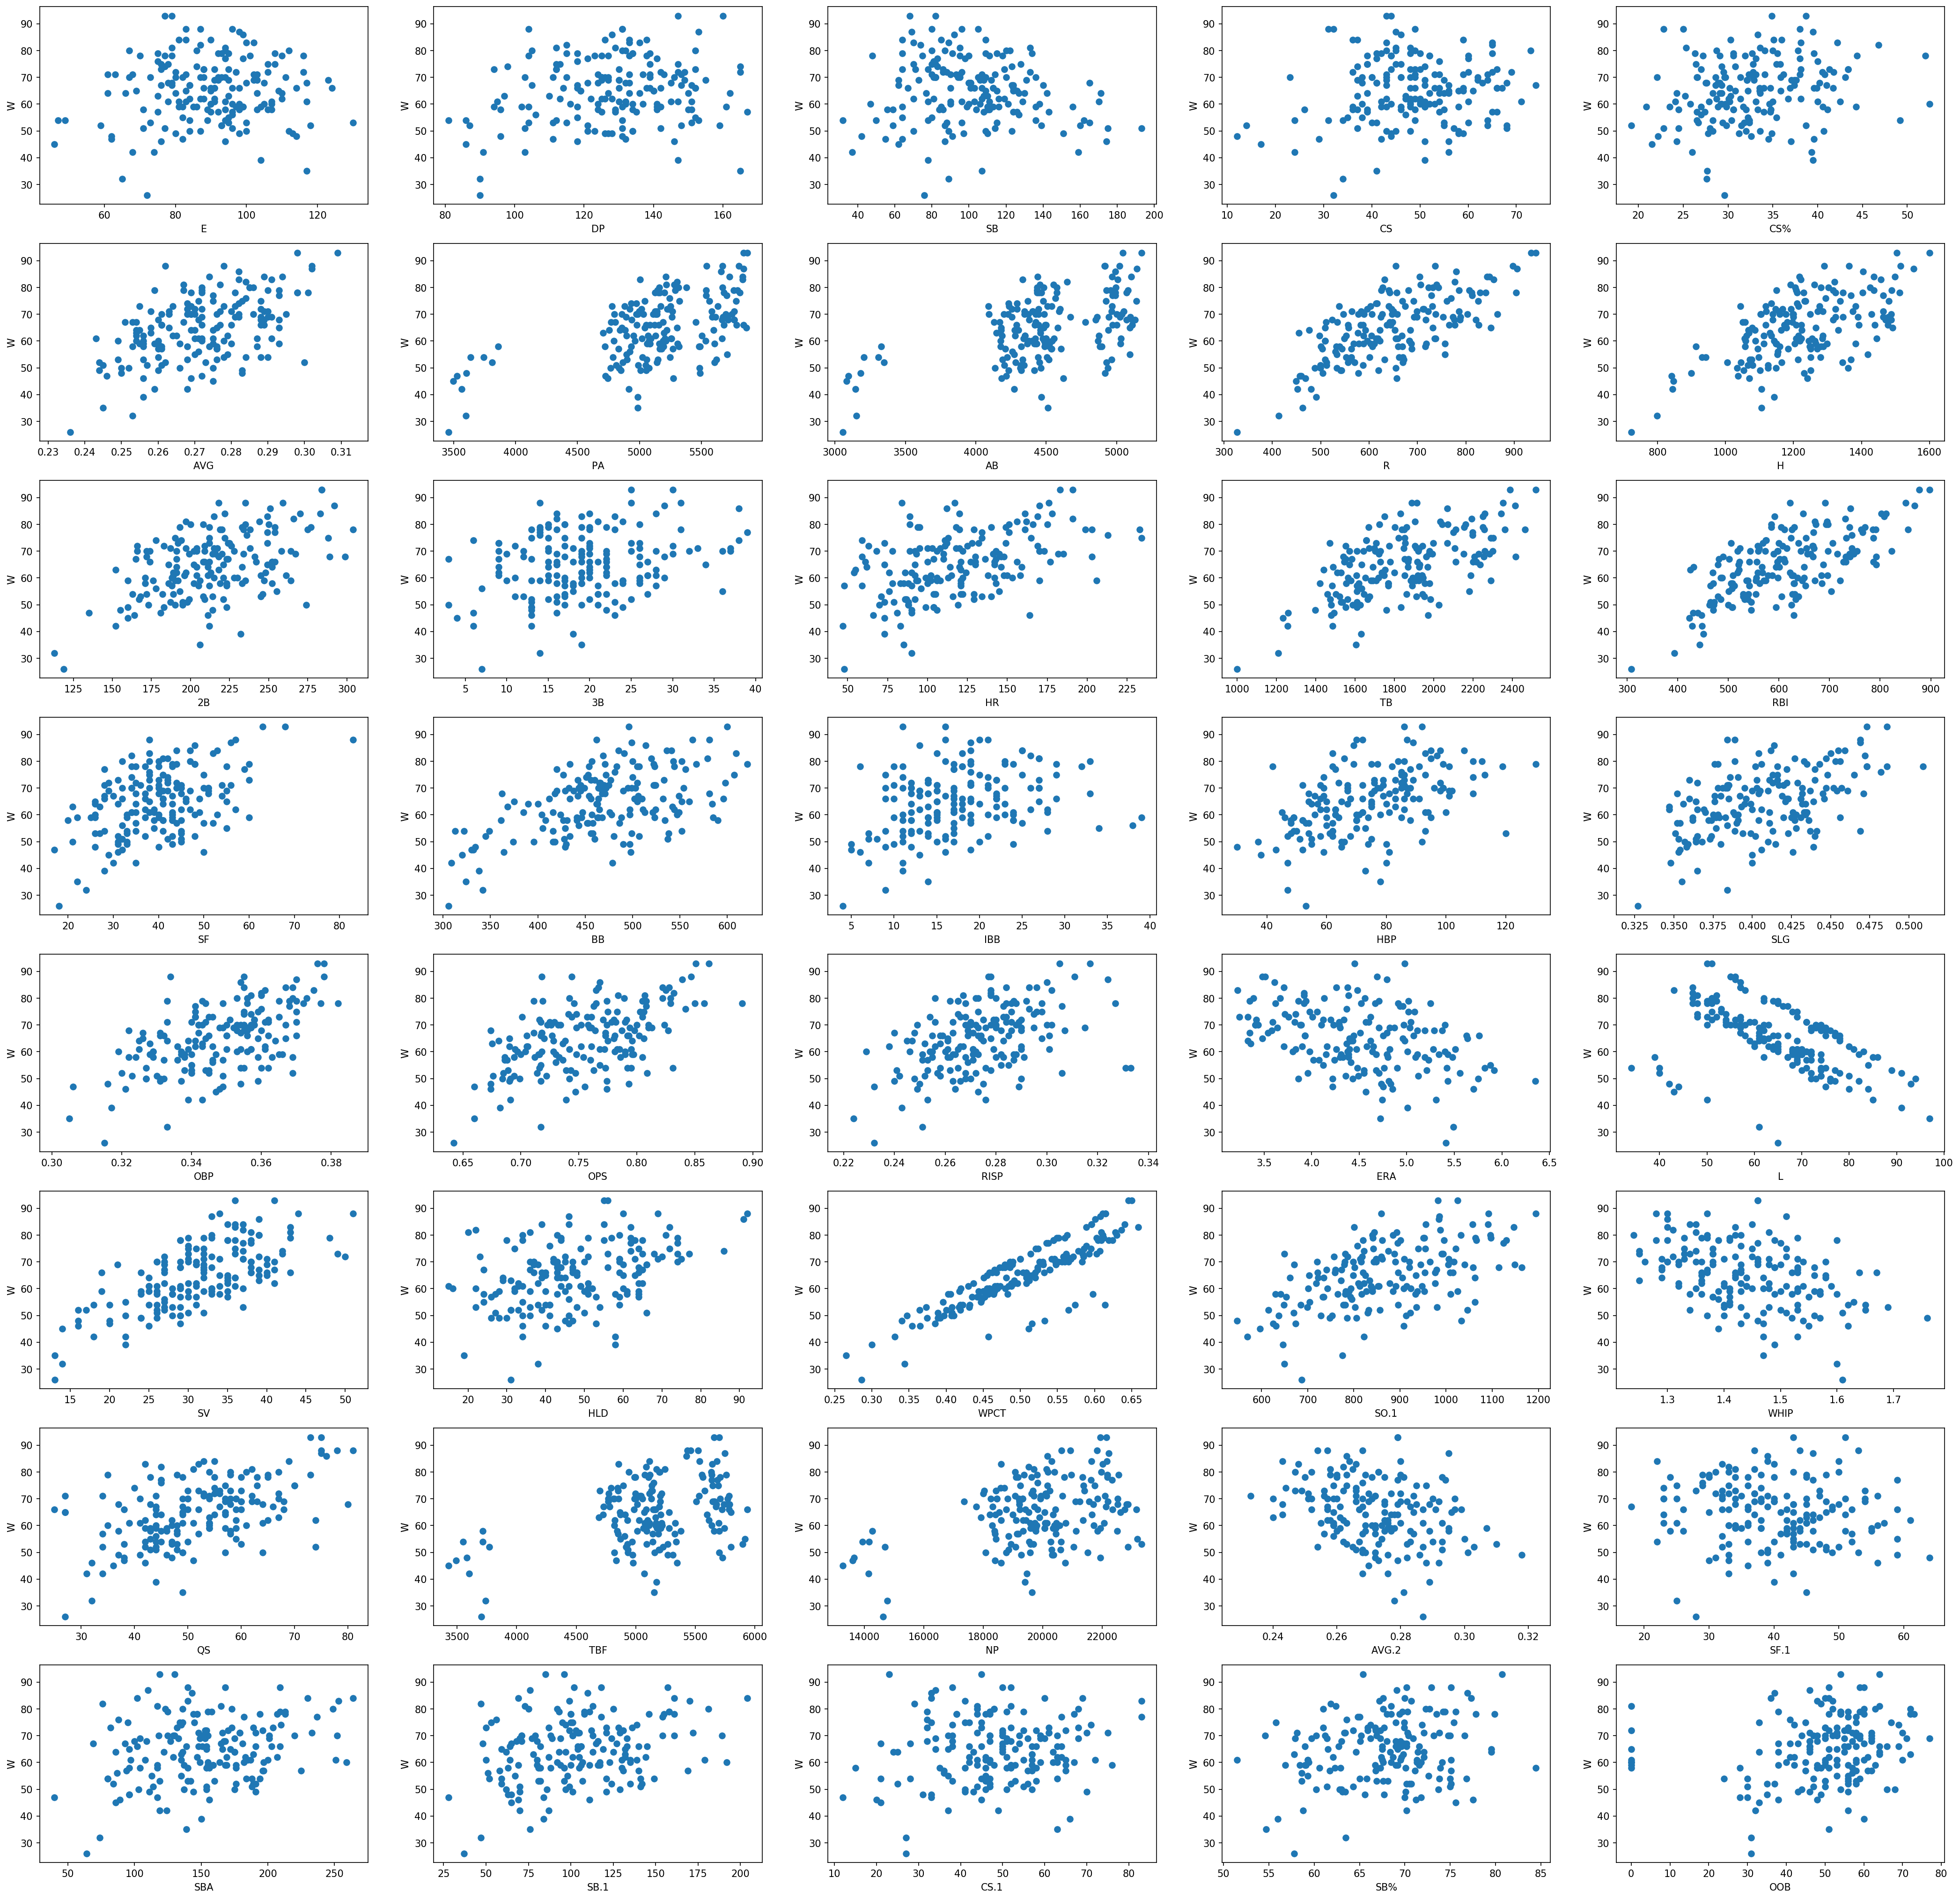

In [25]:
count=1
plt.figure(figsize=(35,35), dpi=150)
for item in list(df.columns):
    if item!='W':
        plt.subplot(8, 5, count)
        plt.xlabel(item)
        plt.ylabel('W')
        plt.scatter(df[item], df['W'])
    count += 1

### Drop 요소 선택

In [26]:
drop_list = ['SB%', 'CS.1', 'TBF', 'NP', 'AVG.2', 'SF.1', 'L', 'IBB', 'AB', 'PA', 'E', 'CS%']
df = df.drop(drop_list, axis=1)

df.head()

DP   SB  CS    AVG    R     H   2B  3B   HR    TB  ...  SV  HLD   WPCT  \
0  134  100  53  0.278  683  1263  221  17  142  1944  ...  28   16  0.469   
1  129  110  55  0.276  669  1247  219  24   85  1769  ...  26   27  0.464   
2  124  106  44  0.260  596  1143  215  11  113  1719  ...  33   22  0.458   
3  140  126  56  0.276  732  1266  221  26  130  1929  ...  35   40  0.508   
4  141   85  58  0.280  718  1265  247  24  121  1923  ...  33   28  0.457   

   SO.1  WHIP  QS  SBA  SB.1  OOB   W  
0   743  1.47  35  155    92    0  60  
1   765  1.60  43  154    96    0  58  
2   908  1.41  61  182   123    0  60  
3   799  1.56  27  166   132    0  65  
4   790  1.50  43  159   106    0  59  

[5 rows x 29 columns]

### DATA Split

In [27]:
x_data = df.values[:, 0:len(df.columns)-1]
x_data

array([[134., 100.,  53., ..., 155.,  92.,   0.],
       [129., 110.,  55., ..., 154.,  96.,   0.],
       [124., 106.,  44., ..., 182., 123.,   0.],
       ...,
       [ 91.,  37.,  24., ..., 124.,  87.,  32.],
       [ 96.,  59.,  26., ...,  96.,  81.,  28.],
       [ 90.,  76.,  32., ...,  64.,  37.,  31.]])

In [28]:
y_data = df.values[:, [len(df.columns)-1]]
y_data

array([[60.],
       [58.],
       [60.],
       [65.],
       [59.],
       [81.],
       [61.],
       [72.],
       [78.],
       [66.],
       [61.],
       [66.],
       [35.],
       [82.],
       [59.],
       [70.],
       [78.],
       [60.],
       [66.],
       [57.],
       [39.],
       [76.],
       [63.],
       [80.],
       [67.],
       [59.],
       [61.],
       [70.],
       [50.],
       [73.],
       [53.],
       [75.],
       [49.],
       [54.],
       [70.],
       [72.],
       [58.],
       [74.],
       [64.],
       [53.],
       [64.],
       [47.],
       [60.],
       [63.],
       [50.],
       [73.],
       [67.],
       [70.],
       [51.],
       [58.],
       [73.],
       [70.],
       [55.],
       [62.],
       [67.],
       [56.],
       [57.],
       [46.],
       [83.],
       [70.],
       [69.],
       [65.],
       [50.],
       [64.],
       [81.],
       [54.],
       [80.],
       [71.],
       [66.],
       [64.],
       [46.],
      

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [30]:
x_data = scaler.fit_transform(x_data)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((147, 28), (147, 1), (27, 28), (27, 1))

### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[-4.15752682e-02  5.42823016e-01 -3.40978220e-01 -4.24755942e-01
   1.10746148e+00 -1.86728219e+13 -4.14110467e+12 -1.70658792e+12
  -1.37190056e+13  3.34029241e+13  1.82379499e+00  4.35451167e-01
  -7.97664055e-01 -3.93010137e-01 -1.38631056e+14 -5.97942169e+13
   1.88071917e+14 -1.35606210e+00  6.99314443e-01  1.83245008e-01
  -2.06780280e-01  1.09314306e+01  2.13888616e-01  1.07313525e-01
   9.03140919e-01  8.35312118e-01 -7.19835474e-01  2.05673232e-01]]
절편: [64.98320246]
훈련 정확도:0.98599
테스트 정확도:0.98071


In [33]:
y_predict = lr.predict(X_test)

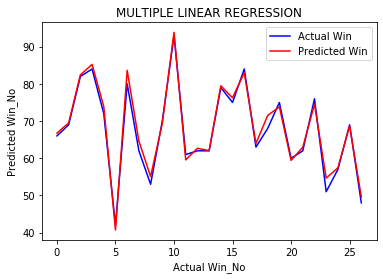

In [34]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='b')
plt.plot(y_predict, color='r')
plt.xlabel("Actual Win_No")
plt.ylabel("Predicted Win_No")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.legend(['Actual Win', 'Predicted Win'])
plt.show()

# Test 4

### 탐색적 데이터 분석

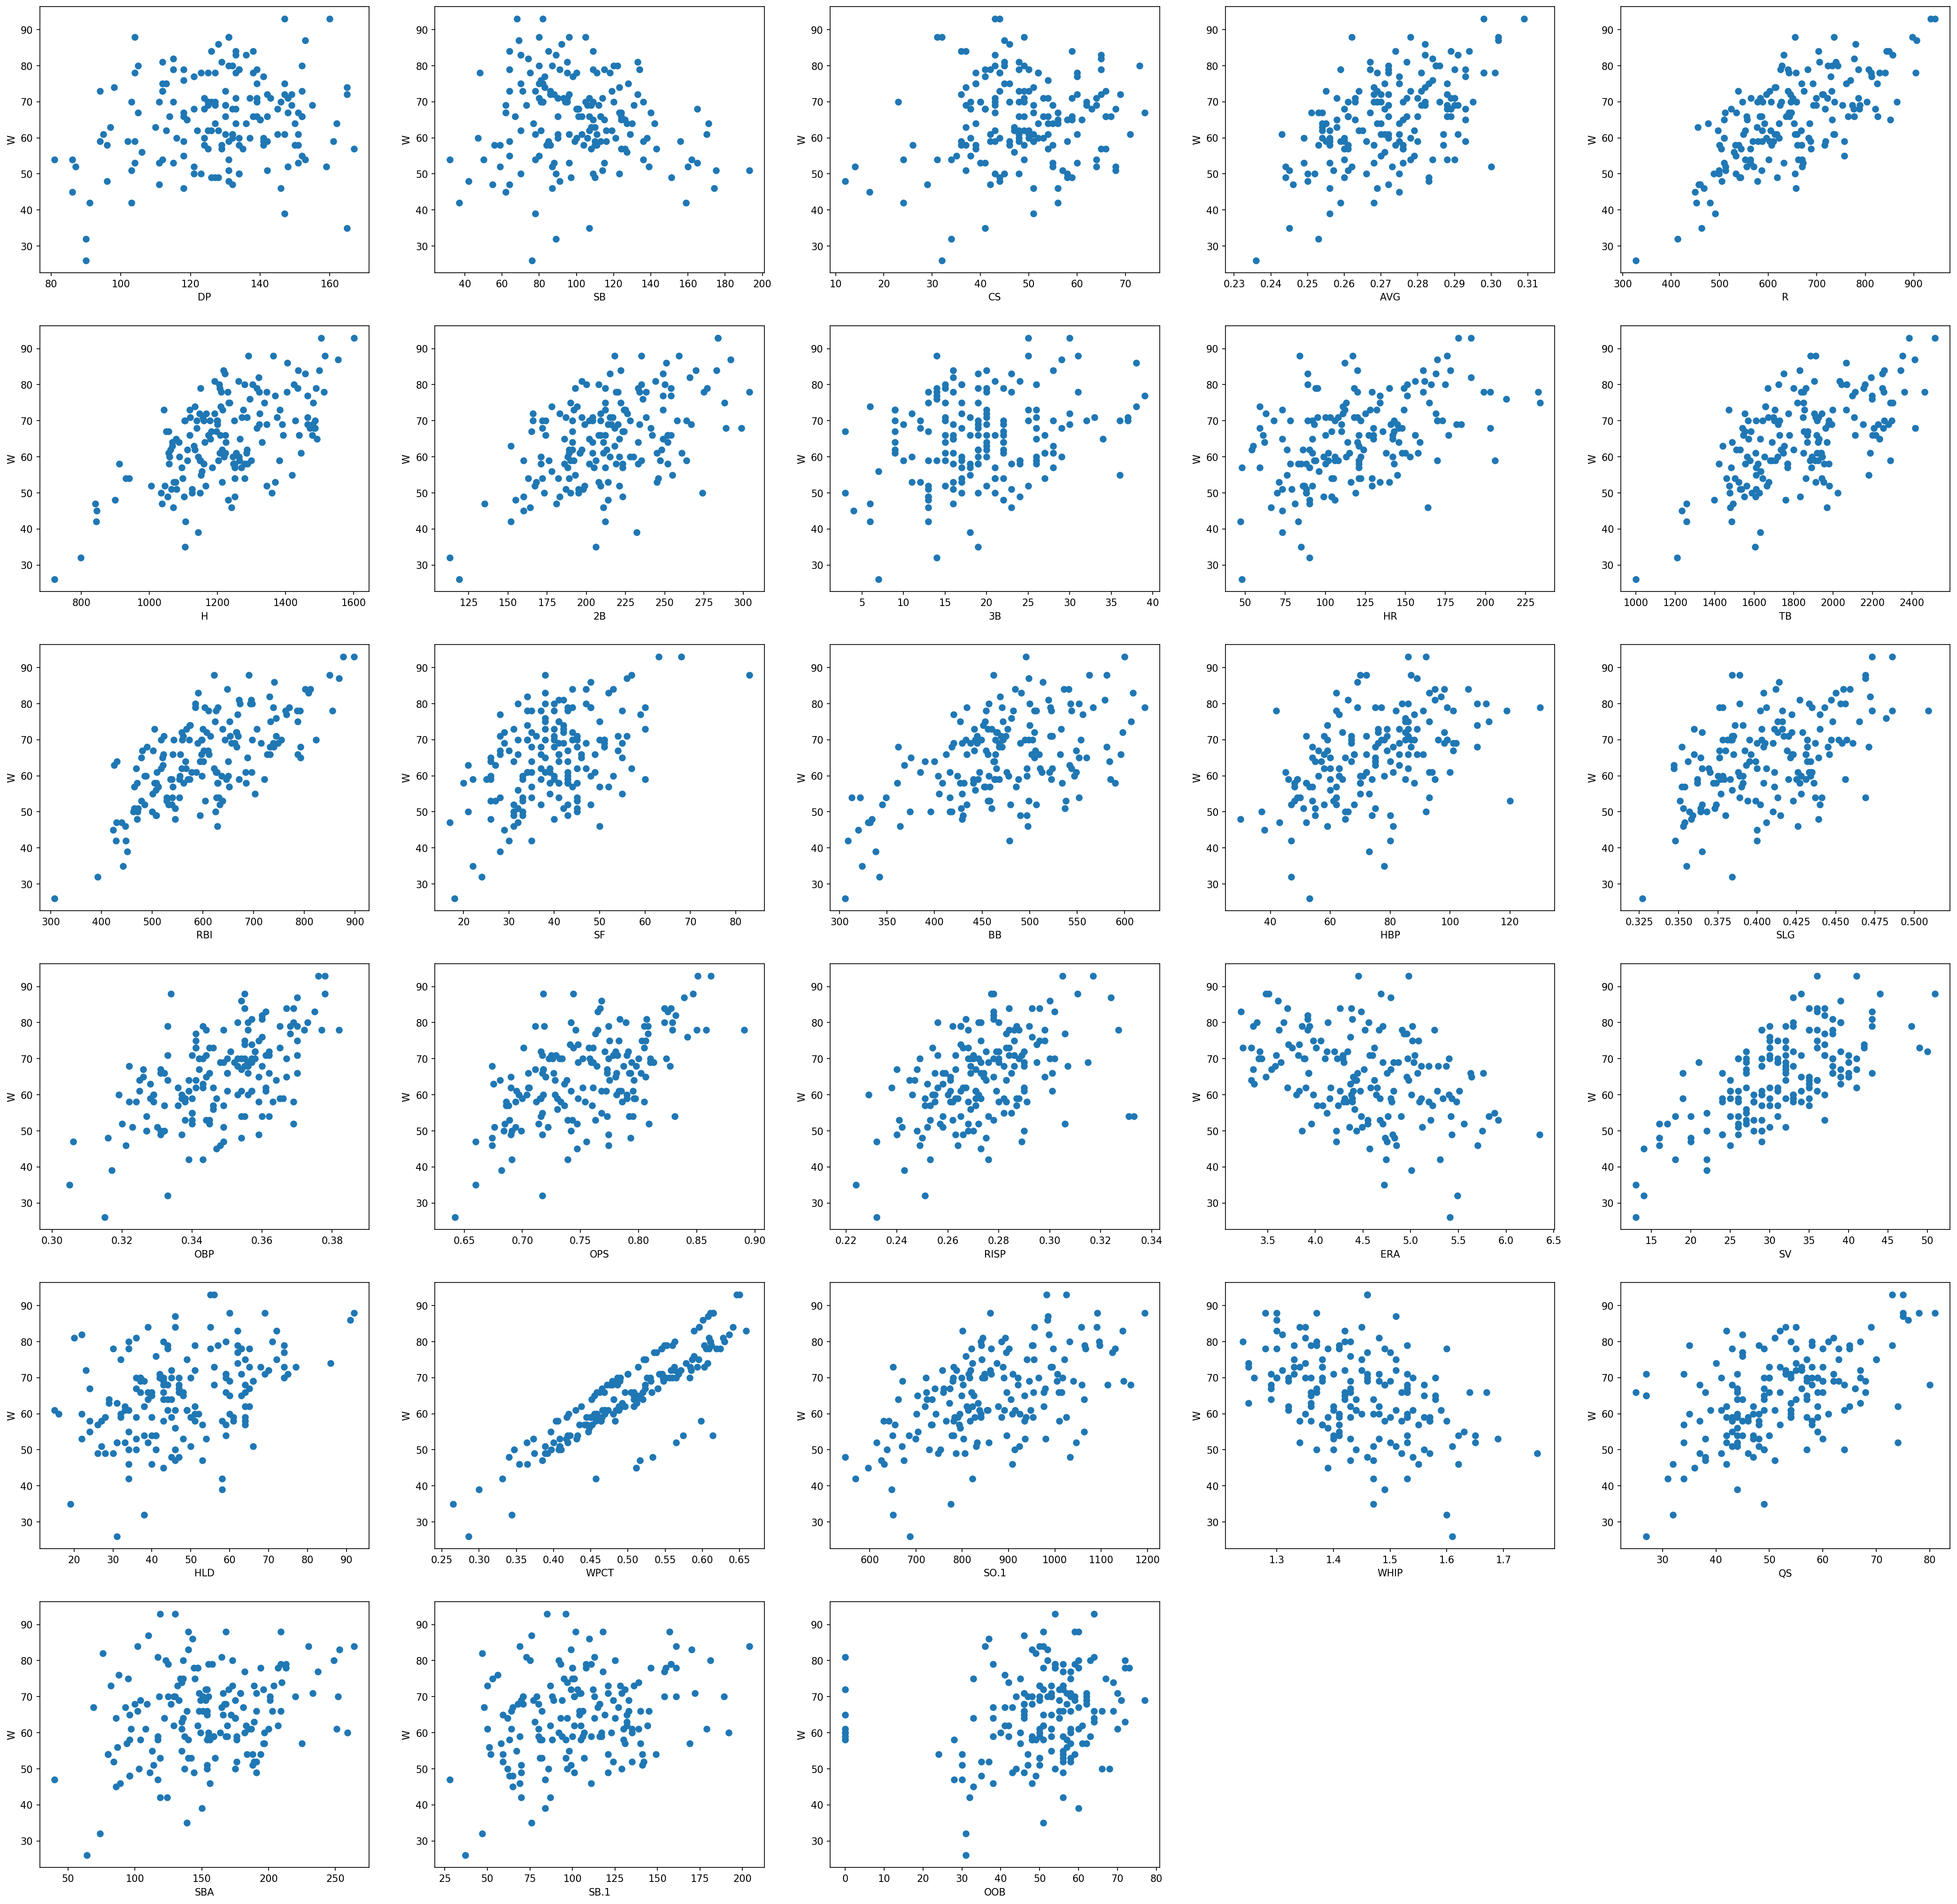

In [35]:
count=1
plt.figure(figsize=(35,35), dpi=150)
for item in list(df.columns):
    if item!='W':
        plt.subplot(6, 5, count)
        plt.xlabel(item)
        plt.ylabel('W')
        plt.scatter(df[item], df['W'])
    count += 1

### Drop 요소 선택

In [36]:
drop_list = ['SB.1', 'SBA', 'HLD', '3B', 'CS', 'SB', 'DP']
df = df.drop(drop_list, axis=1)

df.head()

AVG    R     H   2B   HR    TB  RBI  SF   BB  HBP  ...    OPS   RISP  \
0  0.278  683  1263  221  142  1944  637  43  497   56  ...  0.781  0.272   
1  0.276  669  1247  219   85  1769  630  41  590   52  ...  0.754  0.280   
2  0.260  596  1143  215  113  1719  555  26  457   71  ...  0.728  0.255   
3  0.276  732  1266  221  130  1929  688  46  560   60  ...  0.780  0.278   
4  0.280  718  1265  247  121  1923  671  60  585   60  ...  0.790  0.288   

    ERA  SV   WPCT  SO.1  WHIP  QS  OOB   W  
0  5.01  28  0.469   743  1.47  35    0  60  
1  5.09  26  0.464   765  1.60  43    0  58  
2  4.38  33  0.458   908  1.41  61    0  60  
3  4.96  35  0.508   799  1.56  27    0  65  
4  4.68  33  0.457   790  1.50  43    0  59  

[5 rows x 22 columns]

### DATA Split

In [37]:
x_data = df.values[:, 0:len(df.columns)-1]
x_data

array([[2.780e-01, 6.830e+02, 1.263e+03, ..., 1.470e+00, 3.500e+01,
        0.000e+00],
       [2.760e-01, 6.690e+02, 1.247e+03, ..., 1.600e+00, 4.300e+01,
        0.000e+00],
       [2.600e-01, 5.960e+02, 1.143e+03, ..., 1.410e+00, 6.100e+01,
        0.000e+00],
       ...,
       [2.680e-01, 4.520e+02, 8.440e+02, ..., 1.470e+00, 3.100e+01,
        3.200e+01],
       [2.740e-01, 5.390e+02, 9.120e+02, ..., 1.360e+00, 3.700e+01,
        2.800e+01],
       [2.360e-01, 3.270e+02, 7.220e+02, ..., 1.610e+00, 2.700e+01,
        3.100e+01]])

In [38]:
y_data = df.values[:, [len(df.columns)-1]]
y_data

array([[60.],
       [58.],
       [60.],
       [65.],
       [59.],
       [81.],
       [61.],
       [72.],
       [78.],
       [66.],
       [61.],
       [66.],
       [35.],
       [82.],
       [59.],
       [70.],
       [78.],
       [60.],
       [66.],
       [57.],
       [39.],
       [76.],
       [63.],
       [80.],
       [67.],
       [59.],
       [61.],
       [70.],
       [50.],
       [73.],
       [53.],
       [75.],
       [49.],
       [54.],
       [70.],
       [72.],
       [58.],
       [74.],
       [64.],
       [53.],
       [64.],
       [47.],
       [60.],
       [63.],
       [50.],
       [73.],
       [67.],
       [70.],
       [51.],
       [58.],
       [73.],
       [70.],
       [55.],
       [62.],
       [67.],
       [56.],
       [57.],
       [46.],
       [83.],
       [70.],
       [69.],
       [65.],
       [50.],
       [64.],
       [81.],
       [54.],
       [80.],
       [71.],
       [66.],
       [64.],
       [46.],
      

### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [40]:
x_data = scaler.fit_transform(x_data)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((147, 21), (147, 1), (27, 21), (27, 1))

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)
print("절편:", lr.intercept_)
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[-2.20835466e-01  1.17181276e+00 -2.49062798e+00  1.50251055e-02
  -1.07241202e-01  1.00844915e+01  2.36139848e-01  2.86398329e-01
  -9.12746419e-02  9.20552143e-02 -7.77043852e+13 -3.35153823e+13
   1.05416586e+14 -4.65261288e-01 -1.63365836e-01  4.99697936e-01
   9.70432148e+00  4.08285189e-01  1.91866140e-01  4.38694175e-01
   2.02449157e-01]]
절편: [64.80867928]
훈련 정확도:0.98884
테스트 정확도:0.98421


In [43]:
y_predict = lr.predict(X_test)

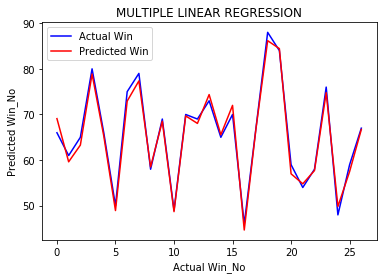

In [44]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='b')
plt.plot(y_predict, color='r')
plt.xlabel("Actual Win_No")
plt.ylabel("Predicted Win_No")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.legend(['Actual Win', 'Predicted Win'])
plt.show()